In [1]:
import sys
sys.path.append('/Users/benj/Documents/HiSPEC-analysis-2/')
import SEC_Class_working as sp
import os
import matplotlib.pyplot as plt
import SEC_Class_working as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


In [2]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/IrBenchmark/10mVs-1-2cycles/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/IrBenchmark/10mVs-1-2cycles/CV-3.3.0.0__0.csv


2
Fitted parameters saved to the interpolation attribute are:
        Amplitude:0.35016213983774797
        Period:1399.9992762833267
        Phase: 0.0004423693521730786 
        Offset: 0.7911801074751426
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


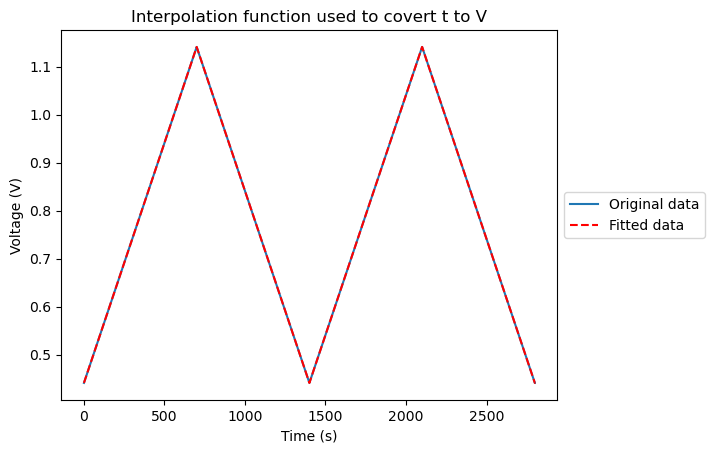

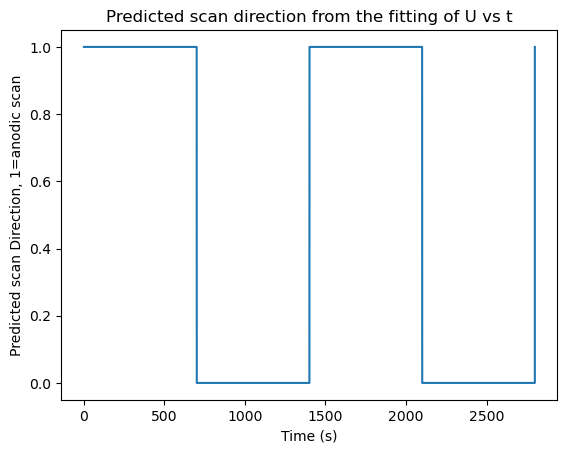

In [3]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()
SpEC1.Downsample_spec_scans(0.005, 1)
test, ref =sp.calculateDOD(SpEC1, 0, 'Cathodic', -1,11)

In [4]:
test=SpEC1.CV
test

,t_s,Ewe_V,I_A,Cycle
0,0.100000,0.441011,-0.001328,0
1,0.200000,0.441108,-0.001046,0
2,0.300000,0.441205,-0.000826,0
3,0.400000,0.441306,-0.000654,0
4,0.500000,0.441409,-0.000518,0
...,...,...,...,...
27997,2799.800049,0.441310,-0.000023,1
27998,2799.900146,0.441211,-0.000023,1
27999,2800.000000,0.441119,-0.000023,1
28000,2800.100098,0.441016,-0.000023,1


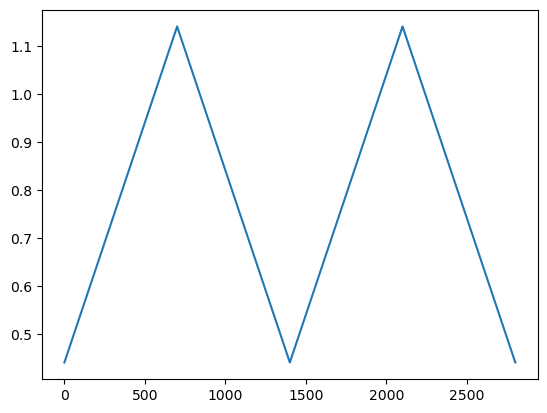

In [5]:
# plot the second and third collumns of test using iloc
plt.plot(test.iloc[:,0], test.iloc[:,1])

(7001, 2)


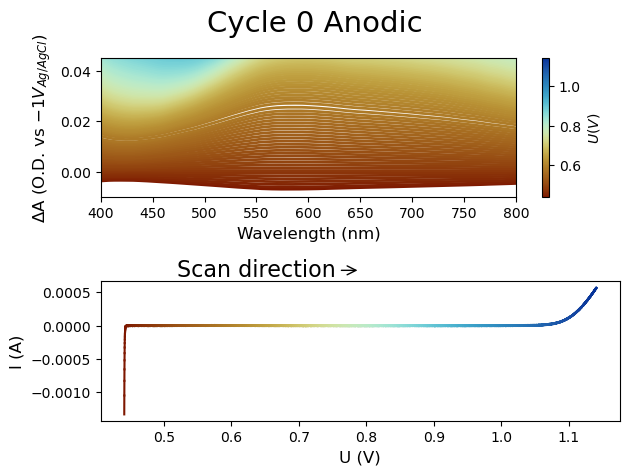

(7000, 2)


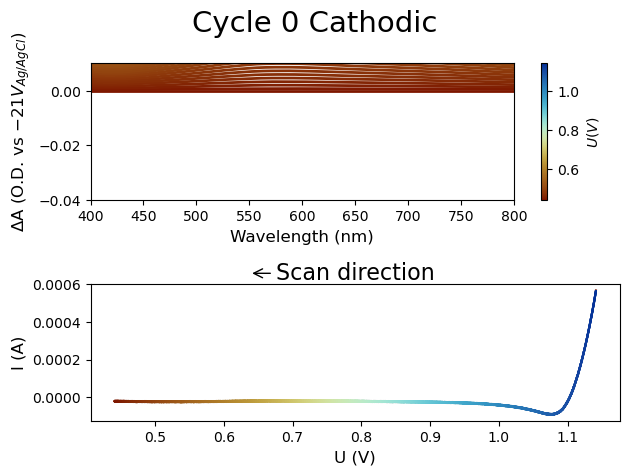

(7000, 2)


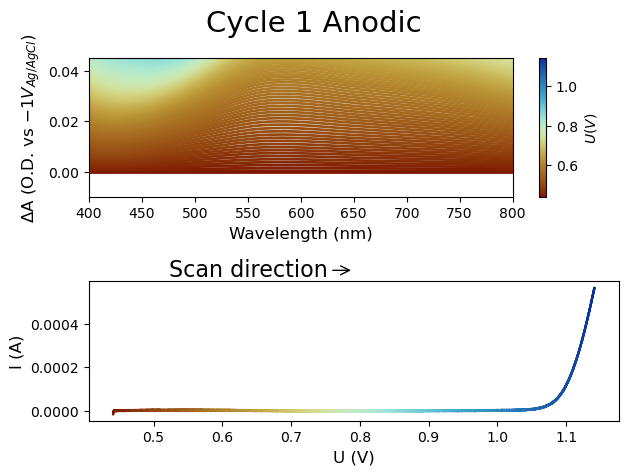

(7000, 2)


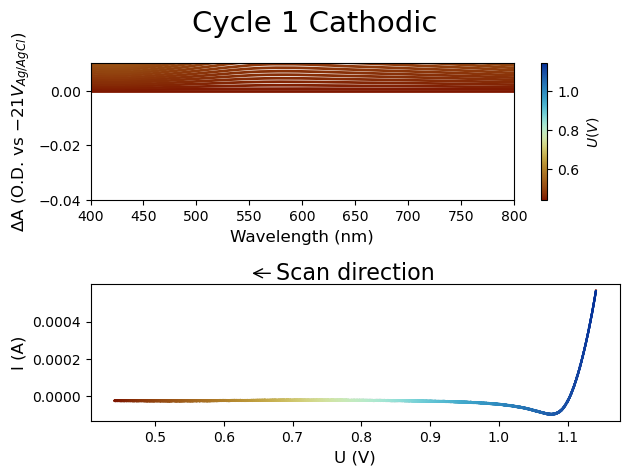

In [17]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -1, 21)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.045, y_min=-0.01,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -21, 21)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.01, y_min=-0.04,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -1V_{Ag/AgCl}$)'>)

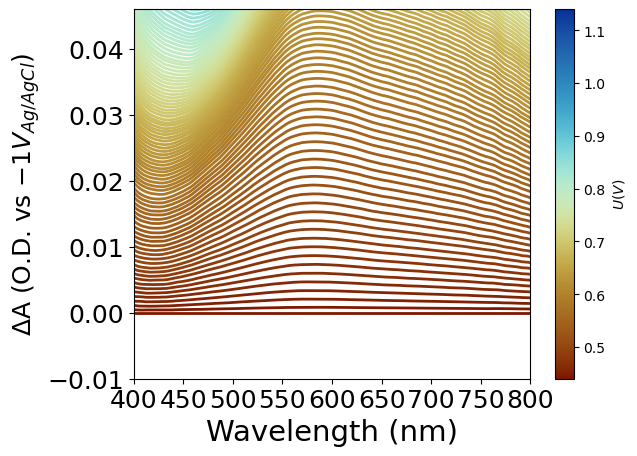

In [18]:
data, ref=sp.calculateDOD(SpEC1, 0, 'Cathodic', -1, 21)
sp.plot_DOD(data, y_max=0.046, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

In [8]:
data=sp.calculateDOD(SpEC1, 0, 'Anodic', -0.2, 21)[0]
data

Voltage (V),0.440,0.445,0.450,0.455,0.460,0.465,0.470,0.475,0.480,0.485,...,1.095,1.100,1.105,1.110,1.115,1.120,1.125,1.130,1.135,1.140
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
400,0.0,-0.003556,-0.003204,-0.002599,-0.002049,-0.001344,-0.000763,-0.000224,0.000296,0.000863,...,0.086964,0.087447,0.087910,0.088389,0.088823,0.089176,0.089508,0.089815,0.090262,0.090511
401,0.0,-0.003527,-0.003170,-0.002572,-0.002028,-0.001344,-0.000771,-0.000245,0.000293,0.000862,...,0.086464,0.086938,0.087385,0.087864,0.088309,0.088649,0.088989,0.089317,0.089755,0.090017
402,0.0,-0.003499,-0.003138,-0.002546,-0.002007,-0.001341,-0.000775,-0.000259,0.000293,0.000861,...,0.086001,0.086469,0.086904,0.087384,0.087837,0.088166,0.088514,0.088855,0.089287,0.089559
403,0.0,-0.003472,-0.003108,-0.002521,-0.001986,-0.001335,-0.000776,-0.000267,0.000296,0.000860,...,0.085572,0.086037,0.086463,0.086945,0.087403,0.087724,0.088080,0.088428,0.088857,0.089136
404,0.0,-0.003446,-0.003081,-0.002497,-0.001966,-0.001327,-0.000774,-0.000269,0.000299,0.000859,...,0.085175,0.085640,0.086061,0.086544,0.087006,0.087320,0.087683,0.088035,0.088462,0.088746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,-0.003347,-0.002951,-0.002349,-0.001782,-0.001213,-0.000654,-0.000160,0.000389,0.000909,...,0.081684,0.082233,0.082738,0.083285,0.083790,0.084218,0.084589,0.085012,0.085372,0.085628
939,0.0,-0.003326,-0.002929,-0.002344,-0.001777,-0.001210,-0.000651,-0.000157,0.000398,0.000910,...,0.082054,0.082604,0.083111,0.083661,0.084164,0.084593,0.084965,0.085387,0.085748,0.086002
940,0.0,-0.003308,-0.002910,-0.002343,-0.001774,-0.001210,-0.000650,-0.000152,0.000410,0.000917,...,0.082520,0.083070,0.083577,0.084129,0.084629,0.085057,0.085431,0.085848,0.086210,0.086461


(-0.0002, 0.002)

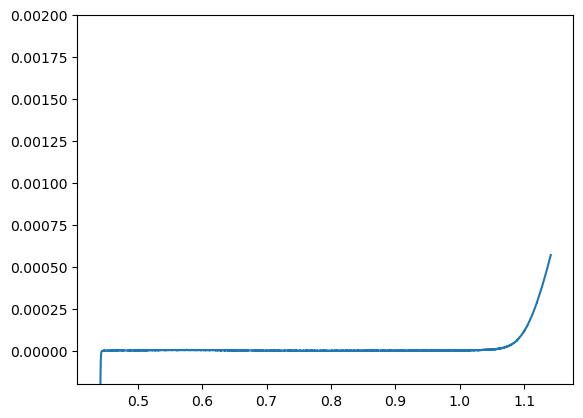

In [9]:
test=SpEC1.CV_scans[0]['Anodic']

# plot the fist and second collumns of test

plt.plot(test.iloc[:,1], test.iloc[:,2])
# set the y range from -0.0001 to 0.002
plt.ylim(-0.0002, 0.002)
#

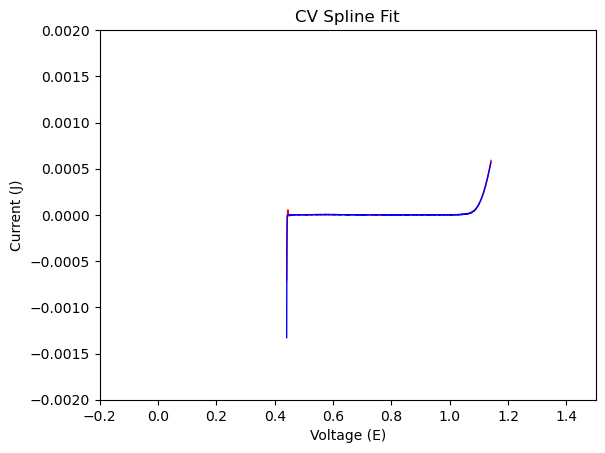

array(-561.23425521)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Extract current and voltage data from the DataFrame
J = test.iloc[:, 2]
E = test.iloc[:, 1]

# Sort the data by voltage
sorted_indices = np.argsort(E)
E_sorted = E.iloc[sorted_indices]
J_sorted = J.iloc[sorted_indices]

# Fit the CV to a spline function
spl = UnivariateSpline(E_sorted, J_sorted)
spl.set_smoothing_factor(0.000001)

# Plot the spline function
plt.plot(E_sorted, spl(E_sorted), 'r', lw=1)

# Plot the original data
plt.plot(E_sorted, J_sorted, 'b', lw=1) 
plt.xlabel('Voltage (E)')
plt.ylabel('Current (J)')
plt.title('CV Spline Fit')
# set the x range from -0.2 to 1.5
plt.xlim(-0.2, 1.5)

# set the y range from -0.002 to 0.002
plt.ylim(-0.002, 0.002)

plt.show()

# use the spline function to calculate the current at a specific voltage
spl(0.)





In [11]:
sorted_indices

0          0
1          1
2          2
3          3
4          4
        ... 
6996    6996
6997    6997
6998    6998
6999    6999
7000    7000
Name: Ewe_V, Length: 7001, dtype: int64

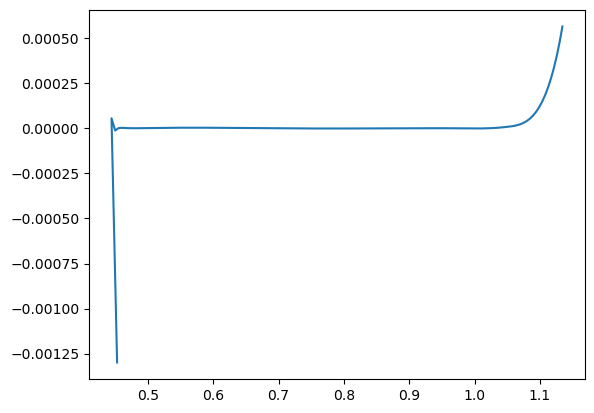

In [12]:
Spectral_voltages=data.columns.values
Spectral_currents=spl(Spectral_voltages)

Cell_resistance=10 # ohms

iR=Cell_resistance*Spectral_currents

Spectral_voltages_corrected=Spectral_voltages-iR

plt.plot(Spectral_voltages_corrected, Spectral_currents)



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -1V_{Ag/AgCl}$)'>)

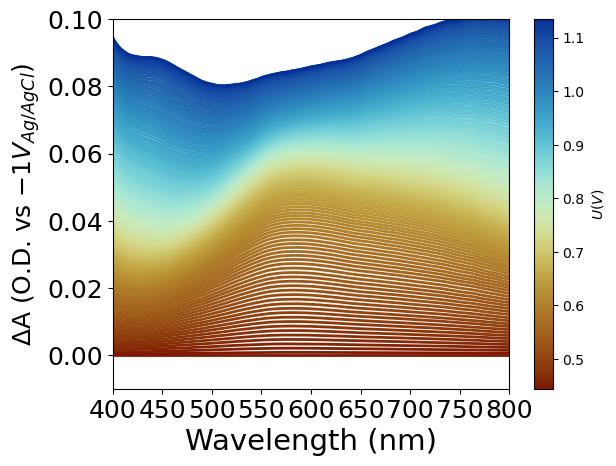

In [19]:
# use Spectral_voltages_corrected as the collumn names for the data

data_iR=data.copy(deep=True) 

data_iR.columns=Spectral_voltages_corrected

data_iR

# use plot_DOD to plot the data_iR

sp.plot_DOD(data_iR, y_max=0.1, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -1V_{Ag/AgCl}$)'>)

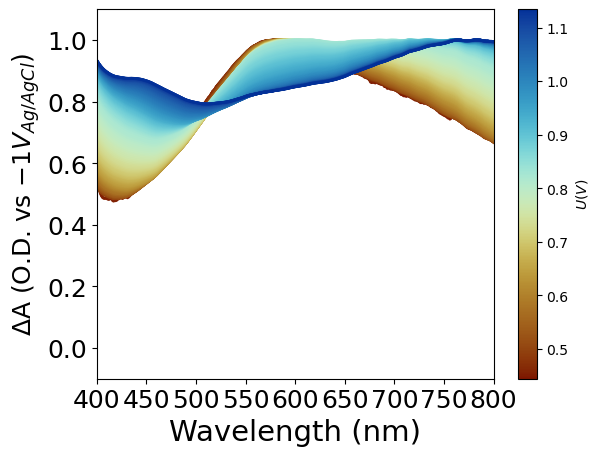

In [20]:

# normalise the data_iR

data_iR_norm=sp.normalise_DOD(data_iR.abs())

# plot the normalised data_iR📈

sp.plot_DOD(data_iR_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")



/var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/ipykernel_8877/3047782232.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

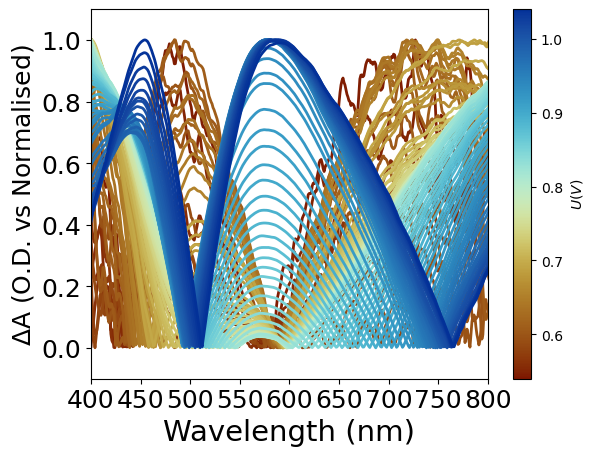

In [15]:
# loop though data_iR_norm and from collumn 20 to collumn n-20 
# subtract collumn 20 from collumn i-20, put this into a new dataframe called data_iR_norm_diff

step=20
data_iR_diff=pd.DataFrame()
for i in range(step, len(data_iR_norm.columns)-step):
    data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
    # apply a savinky golay filter to the data_iR_norm_diff using the function savgol_filter from scipy.signal
    data_iR_diff[data_iR_norm.columns[i]]=signal.savgol_filter(data_iR_diff[data_iR_norm.columns[i]], 5, 3)

    
# normalise the data_iR_diff

data_iR_diff_norm=sp.normalise_DOD(data_iR_diff.abs())


sp.plot_DOD(data_iR_diff_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")




In [16]:
print(data_iR_diff_norm.columns.values[0], data_iR_diff_norm.columns.values[50], data_iR_diff_norm_U.columns.values[90])

NameError: name 'data_iR_diff_norm_U' is not defined

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

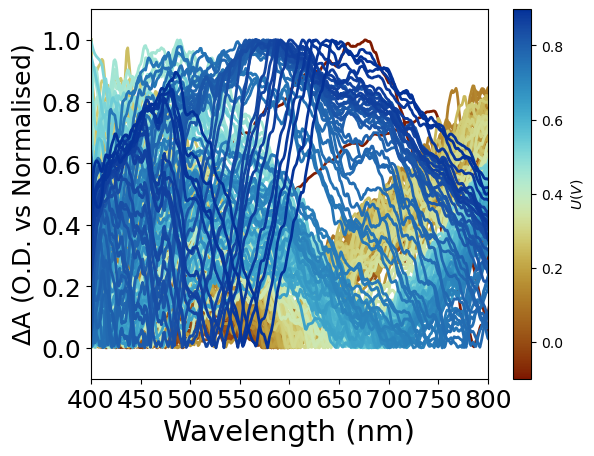

In [ ]:
Ustart=data_iR_diff_norm.columns.values[0]
Uend=data_iR_diff_norm.columns.values[200]


# get the data between Ustart and Uend

data_iR_diff_norm_U=data_iR_diff_norm.loc[:, Ustart:Uend]

# plot the data_iR_diff_norm_U

sp.plot_DOD(data_iR_diff_norm_U, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")